In [1]:
# Import all libraries needed for the tutorial
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Enable inline plotting
%matplotlib inline 

In [2]:
insp_df = pd.read_csv('inspections.csv')
vio_df = pd.read_csv('violations.csv')

In [3]:
insp_df.describe()


,program_element_pe,score,service_code
count,191371.000000,191371.000000,191371.000000
mean,1629.888980,93.753306,7.078246
std,9.391426,3.845518,48.932257
min,1610.000000,54.000000,1.000000
25%,1631.000000,91.000000,1.000000
50%,1632.000000,94.000000,1.000000
75%,1635.000000,97.000000,1.000000
max,1641.000000,100.000000,401.000000


## Interesting results of scores having a grouping of 90

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x112b91208>]],
      dtype=object)

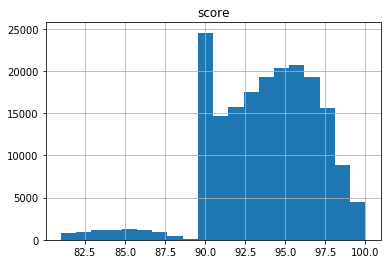

In [4]:
insp_df[insp_df['score'] > 80].hist('score', bins=20)

In [5]:
insp_df.head()
insp_df['short_zip'] = insp_df['facility_zip'].str[0:5]

In [6]:
insp_with_vio = insp_df.merge(vio_df, how = 'left', on = 'serial_number')

In [7]:
insp_with_vio.head()

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,record_id,score,serial_number,service_code,service_description,short_zip,points,violation_code,violation_description,violation_status
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,91344,1.0,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE
1,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,91344,1.0,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE
2,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION,90505,1.0,F035,# 35. Equipment/Utensils - approved; installed...,OUT OF COMPLIANCE
3,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION,90505,1.0,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
4,2017-04-10,EE0000126,3615 PACIFIC COAST HWY,TORRANCE,FA0242138,SHAKEY'S PIZZA,CA,90505,A,OW0237843,...,PR0190290,94,DAL3SBUE0,1,ROUTINE INSPECTION,90505,1.0,F033,# 33. Nonfood-contact surfaces clean and in go...,OUT OF COMPLIANCE


In [8]:
insp_df.head(1)

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,pe_description,program_element_pe,program_name,program_status,record_id,score,serial_number,service_code,service_description,short_zip
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,"FOOD MKT RETAIL (25-1,999 SF) HIGH RISK",1612,HOVIK'S FAMOUS MEAT & DELI,ACTIVE,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,91344


### Looking at finding averages of different groups 

In [9]:
emp_df = insp_with_vio


In [10]:
emp_df.head(1)

,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,record_id,score,serial_number,service_code,service_description,short_zip,points,violation_code,violation_description,violation_status
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,91344,1.0,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE


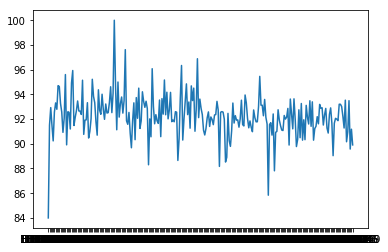

In [11]:
emp_means = emp_df.groupby('employee_id').mean()
plt.plot(emp_means['score'])
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

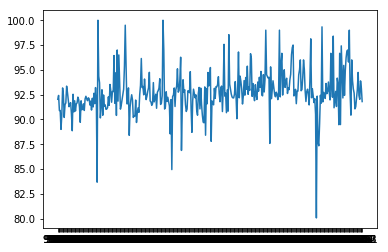

In [12]:
zip_means = emp_df.groupby('short_zip').mean()
# print(zip_means)
plt.plot(zip_means['score'])
plt.show

In [13]:
zip_means['score'].std()



2.2046933560629736

In [14]:
insp_with_vio.head(1)


,activity_date,employee_id,facility_address,facility_city,facility_id,facility_name,facility_state,facility_zip,grade,owner_id,...,record_id,score,serial_number,service_code,service_description,short_zip,points,violation_code,violation_description,violation_status
0,2017-05-09,EE0000593,17660 CHATSWORTH ST,GRANADA HILLS,FA0175397,HOVIK'S FAMOUS MEAT & DELI,CA,91344,A,OW0181955,...,PR0168541,98,DAHDRUQZO,1,ROUTINE INSPECTION,91344,1.0,F029,"# 29. Toxic substances properly identified, st...",OUT OF COMPLIANCE


### Most Common violations, most common by grade


In [15]:
grade_violations_df = insp_with_vio

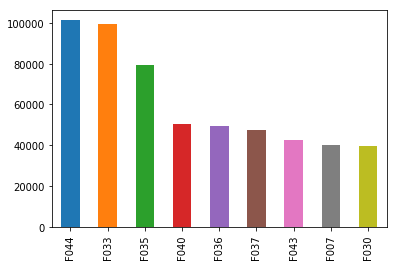

F044    101243
F033     99451
F035     79043
F040     50491
F036     49464
F037     47723
F043     42676
F007     40416
F030     39668
Name: violation_code, dtype: int64


In [16]:
noted_violations = grade_violations_df['violation_code'].value_counts() 
#violation_description gives full name
top_violations = noted_violations[0:9]
top_violations.plot(kind = 'bar')
plt.show()

print(top_violations)


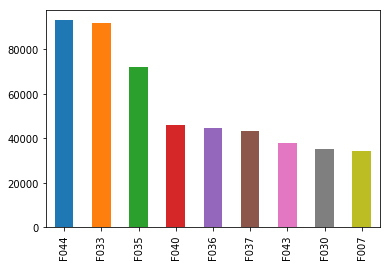

F044    93161
F033    91957
F035    71865
F040    45963
F036    44668
F037    43120
F043    37814
F030    35390
F007    34486
Name: violation_code, dtype: int64


In [17]:
### by grade A
noted_violations = grade_violations_df[grade_violations_df['grade'] == 'A']['violation_code'].value_counts() 
#violation_description gives full name
top_violations = noted_violations[0:9]
top_violations.plot(kind = 'bar')
plt.show()

print(top_violations)

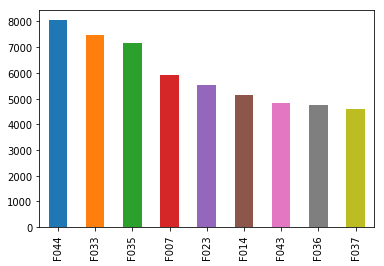

F044    8053
F033    7464
F035    7148
F007    5901
F023    5519
F014    5137
F043    4841
F036    4770
F037    4577
Name: violation_code, dtype: int64


In [18]:
### by grade C & B
noted_violations = grade_violations_df[(grade_violations_df['grade'] == 'C') | (grade_violations_df['grade'] == 'B')]['violation_code'].value_counts() 
#violation_description gives full name
top_violations = noted_violations[0:9]
top_violations.plot(kind = 'bar')
plt.show()

print(top_violations)

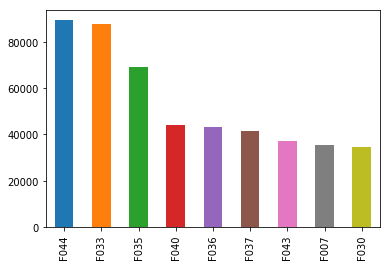

F044    89301
F033    87604
F035    69263
F040    44139
F036    43218
F037    41498
F043    36993
F007    35446
F030    34542
Name: violation_code, dtype: int64


In [19]:
### program status active
noted_violations = grade_violations_df[grade_violations_df['program_status'] == 'ACTIVE']['violation_code'].value_counts() 
#violation_description gives full name
top_violations = noted_violations[0:9]
top_violations.plot(kind = 'bar')
plt.show()

print(top_violations)


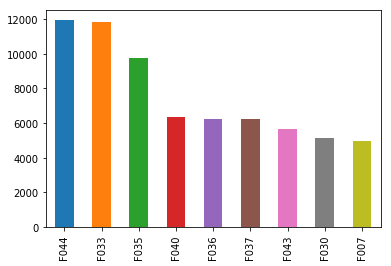

F044    11942
F033    11847
F035     9780
F040     6352
F036     6246
F037     6225
F043     5683
F030     5126
F007     4970
Name: violation_code, dtype: int64


In [20]:
### program status inactive
noted_violations = grade_violations_df[grade_violations_df['program_status'] == 'INACTIVE']['violation_code'].value_counts() 
#violation_description gives full name
top_violations = noted_violations[0:9]
top_violations.plot(kind = 'bar')
plt.show()

print(top_violations)


### Violations by grade

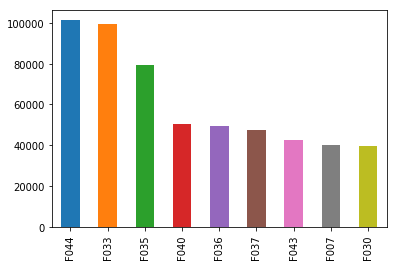

F044    101243
F033     99451
F035     79043
F040     50491
F036     49464
F037     47723
F043     42676
F007     40416
F030     39668
Name: violation_code, dtype: int64


In [21]:
insp_with_vio

noted_violations = grade_violations_df['violation_code'].value_counts()

#violation_description gives full name
top_violations = noted_violations[0:9]
top_violations.plot(kind = 'bar')
plt.show()

print(top_violations)

## Compare A's and C's



In [22]:
grade_violations_df.columns

Index(['activity_date', 'employee_id', 'facility_address', 'facility_city',
       'facility_id', 'facility_name', 'facility_state', 'facility_zip',
       'grade', 'owner_id', 'owner_name', 'pe_description',
       'program_element_pe', 'program_name', 'program_status', 'record_id',
       'score', 'serial_number', 'service_code', 'service_description',
       'short_zip', 'points', 'violation_code', 'violation_description',
       'violation_status'],
      dtype='object')

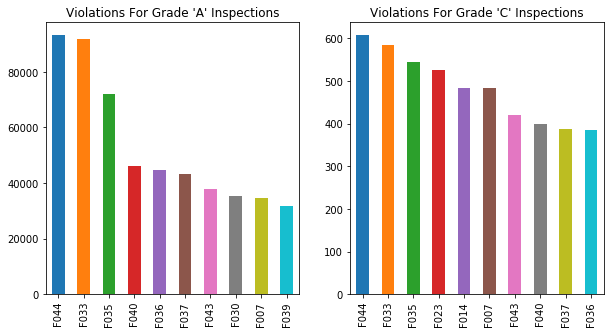

In [23]:
# by grade A
category = 'violation_code'

plt.figure(figsize=(10, 5))
           
plt.subplot(121)
noted_violations_A = grade_violations_df[grade_violations_df['grade'] == 'A'][category].value_counts() 
#violation_description gives full name
top_violations_A = noted_violations_A[0:10]
top_violations_A.plot(kind = 'bar')
plt.title('Violations For Grade \'A\' Inspections')
# ax.legend(labels=viocodes)

# plt.plot(top_violations)
# plt.ylabel('Count of ' + category)
# fig, ax = plt.subplots()
# viocodes = ['F004', 'F033', 'F035']
# top_violations.plot(kind = 'bar', ax=ax)
# ax.legend(labels=viocodes)

# by grade C
plt.subplot(122)
noted_violations_C = grade_violations_df[grade_violations_df['grade'] == 'C'][category].value_counts() 
#violation_description gives full name
top_violations_C = noted_violations_C[0:10]
top_violations_C.plot(kind = 'bar')
plt.title('Violations For Grade \'C\' Inspections')
plt.show()

# insp_with_vio = insp_df.merge(vio_df, how = 'left', on = 'serial_number')
# fig, ax = subplots()
# df = pd.DataFrame({'A':26, 'B':20}, index=['N'])
# df.plot(kind='bar', ax=ax)
# ax.legend(["AAA", "BBB"]);



# print(top_violations)


# plt.figure(figsize=(10, 5))
           
# plt.subplot(121)
# plt.boxplot(beers_df['ounces'])
# plt.ylabel('Ounces')
# plt.title('Ounces Per Can of Craft Beer')

# plt.subplot(122)
# plt.hist(beers_df['ounces'], bins=30)
# plt.xlabel('Ounces')
# plt.title('Number of Cans of Different Volumes')
# plt.show()

## Making the violoation code table

In [24]:
# create df with the violation codes
noted_violations = grade_violations_df[(grade_violations_df['grade'] == 'C') | (grade_violations_df['grade'] == 'A')]['violation_code'].value_counts() 
#violation_description gives full name
top_violations = noted_violations[0:13]
print(top_violations.index)
top_df = pd.DataFrame(top_violations)
top_df
violations_df = top_df.merge(vio_df, how = 'left', left_index=True, right_on='violation_code'  )
violations_df
top_df.columns


Index(['F044', 'F033', 'F035', 'F040', 'F036', 'F037', 'F043', 'F030', 'F007',
       'F039', 'F006', 'F014', 'F023'],
      dtype='object')


Index(['violation_code'], dtype='object')

In [25]:
violations_df.head()

,violation_code,violation_code_x,points,serial_number,violation_code_y,violation_description,violation_status
0,F044,93768,1,DAJ5UNMSF,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
9,F044,93768,1,DAQN0I8EA,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
17,F044,93768,1,DAXJXWTVO,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
23,F044,93768,1,DA7KZFE4Q,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE
25,F044,93768,1,DASN4EKRV,F044,"# 44. Floors, walls and ceilings: properly bui...",OUT OF COMPLIANCE


In [26]:
# this has multiple entries for each code. Creating new df to clean this up
vio_df_single = violations_df

In [27]:
# Trying to remove duplicate rows based on duplicated violation codes
vio_df_single.drop_duplicates(subset='violation_code', keep='first', inplace=True)
vio_df_single.head()
vio_df_single.columns

Index(['violation_code', 'violation_code_x', 'points', 'serial_number',
       'violation_code_y', 'violation_description', 'violation_status'],
      dtype='object')

In [28]:
del vio_df_single['violation_code_x']
del vio_df_single['points']
del vio_df_single['serial_number']
del vio_df_single['violation_code_y']
del vio_df_single['violation_status']


In [29]:
vio_df_single

,violation_code,violation_description
0,F044,"# 44. Floors, walls and ceilings: properly bui..."
2,F033,# 33. Nonfood-contact surfaces clean and in go...
3,F035,# 35. Equipment/Utensils - approved; installed...
13,F040,"# 40. Plumbing: Plumbing in good repair, prope..."
8,F036,"# 36. Equipment, utensils and linens: storage ..."
29,F037,# 37. Adequate ventilation and lighting; desig...
21,F043,# 43. Premises; personal/cleaning items; vermi...
35,F030,# 30. Food properly stored; food storage conta...
1,F007,# 07. Proper hot and cold holding temperatures
22,F039,# 39. Wiping cloths: properly used and stored


In [30]:
vio_df_single.set_index('violation_code', inplace=True)

In [31]:
vio_df_single.columns

Index(['violation_description'], dtype='object')

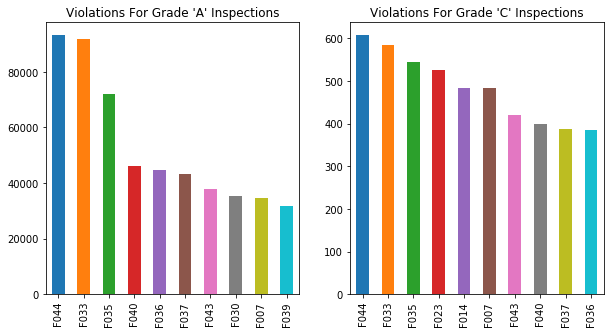

                                            violation_description
violation_code                                                   
F044            # 44. Floors, walls and ceilings: properly bui...
F033            # 33. Nonfood-contact surfaces clean and in go...
F035            # 35. Equipment/Utensils - approved; installed...
F040            # 40. Plumbing: Plumbing in good repair, prope...
F036            # 36. Equipment, utensils and linens: storage ...
F037            # 37. Adequate ventilation and lighting; desig...
F043            # 43. Premises; personal/cleaning items; vermi...
F030            # 30. Food properly stored; food storage conta...
F007               # 07. Proper hot and cold holding temperatures
F039                # 39. Wiping cloths: properly used and stored
F006            # 06. Adequate handwashing facilities supplied...
F014             # 14. Food contact surfaces: clean and sanitized
F023                 # 23. No rodents, insects, birds, or animals


In [32]:
plt.figure(figsize=(10, 5))
           
plt.subplot(121)
noted_violations_A = grade_violations_df[grade_violations_df['grade'] == 'A'][category].value_counts() 
#violation_description gives full name
top_violations_A = noted_violations_A[0:10]
top_violations_A.plot(kind = 'bar')
plt.title('Violations For Grade \'A\' Inspections')
# ax.legend(labels=viocodes)

# plt.plot(top_violations)
# plt.ylabel('Count of ' + category)
# fig, ax = plt.subplots()
# viocodes = ['F004', 'F033', 'F035']
# top_violations.plot(kind = 'bar', ax=ax)
# ax.legend(labels=viocodes)

# by grade C
plt.subplot(122)
noted_violations_C = grade_violations_df[grade_violations_df['grade'] == 'C'][category].value_counts() 
#violation_description gives full name
top_violations_C = noted_violations_C[0:10]
top_violations_C.plot(kind = 'bar')
plt.title('Violations For Grade \'C\' Inspections')
plt.show()

print(vio_df_single)

In [33]:
insp_df[insp_df['grade'] == ' '].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 766 to 176987
Data columns (total 21 columns):
activity_date          32 non-null object
employee_id            32 non-null object
facility_address       32 non-null object
facility_city          32 non-null object
facility_id            32 non-null object
facility_name          32 non-null object
facility_state         32 non-null object
facility_zip           32 non-null object
grade                  32 non-null object
owner_id               32 non-null object
owner_name             32 non-null object
pe_description         32 non-null object
program_element_pe     32 non-null int64
program_name           32 non-null object
program_status         32 non-null object
record_id              32 non-null object
score                  32 non-null int64
serial_number          32 non-null object
service_code           32 non-null int64
service_description    32 non-null object
short_zip              32 non-null object
dtypes: int6

In [34]:
vio_df[vio_df['points'] == 11]

,points,serial_number,violation_code,violation_description,violation_status
454033,11,DAHTQT66N,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE
455289,11,DAAA9LOAL,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE
455323,11,DADLEUDLK,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE
455991,11,DA90F6WUL,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE
456040,11,DAGWYF0V0,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE
456359,11,DAN0P0NYG,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE
457510,11,DA8IY97CP,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE
457590,11,DAB88WZKH,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE
457994,11,DAJ64T5CE,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE
458159,11,DAOLLBCYI,F023,"# 23. No rodents, insects, birds, or animals",OUT OF COMPLIANCE


In [36]:
insp_df[insp_df['grade'] == 'C'].describe()

,program_element_pe,score,service_code
count,682.000000,682.000000,682.000000
mean,1632.583578,74.674487,4.519062
std,7.262413,2.567084,37.380338
min,1610.000000,70.000000,1.000000
25%,1632.000000,73.000000,1.000000
50%,1635.000000,75.000000,1.000000
75%,1638.000000,77.000000,1.000000
max,1641.000000,79.000000,401.000000


In [43]:
vio_df[vio_df['violation_code'] == 'F023'].describe()


,points
count,29730.000000
mean,2.404373
std,1.667817
min,0.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,11.000000


In [51]:
insp_with_vio[(insp_with_vio['grade'] == 'C') & (insp_with_vio['violation_code'] == 'F023')]['points'].describe()

count    525.000000
mean       6.001905
std        4.164325
min        2.000000
25%        2.000000
50%        4.000000
75%       11.000000
max       11.000000
Name: points, dtype: float64

In [50]:
insp_with_vio[(insp_with_vio['grade'] == 'C')]['violation_code'].value_counts()

F044    607
F033    584
F035    545
F023    525
F014    484
F007    483
F043    420
F040    399
F037    387
F036    384
F030    362
F006    341
F050    333
F039    311
F052    262
F029    239
F027    222
F046    195
F001    193
F013    189
F042    183
F034    181
F054    161
F049    161
F025    144
F005    144
F009    138
F038    129
F026    110
F041     88
       ... 
F053     73
F008     72
F032     70
F004     62
F022     59
F021     55
F055     51
F024     37
F015     23
F011     22
F047     16
F031     14
F016     14
F045      7
F051      6
F058      4
F057      3
F002      3
F010      2
F019      2
F028      2
W005      1
F017      1
F003      1
F056      1
W006      1
W001      1
W051      1
W052      1
W047      1
Name: violation_code, Length: 61, dtype: int64